# Logistic Regression

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

In [2]:
import pandas as pd
pd.DataFrame(X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
pd.DataFrame(np.c_[X,y]).corr()

,0,1,2,3,4
0,1.000000,-0.117570,0.871754,0.817941,0.782561
1,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
2,0.871754,-0.428440,1.000000,0.962865,0.949035
3,0.817941,-0.366126,0.962865,1.000000,0.956547
4,0.782561,-0.426658,0.949035,0.956547,1.000000


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=10000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [32]:
probs_y = classifier.predict_proba(X_test)

In [33]:
for x in probs_y[:10]:
    print([round(y,2) for y in x])

[0.0, 0.06, 0.94]
[0.01, 0.96, 0.03]
[0.98, 0.02, 0.0]
[0.0, 0.02, 0.98]
[0.97, 0.03, 0.0]
[0.0, 0.01, 0.99]
[0.98, 0.02, 0.0]
[0.0, 0.75, 0.25]
[0.0, 0.74, 0.26]
[0.02, 0.94, 0.04]


In [43]:
import numpy as np
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<10} ".format("y_test",
                                                         "y_pred", 
                                                         "Setosa(%)",
                                                         "versicolor(%)", 
                                                          "third one(%)")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<13} ".format(x, y, a, b, c) 
                 for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | third one(%) -----------------------------------------------------------------
2          | 2          | 0.0        | 0.06          | 0.94          
1          | 1          | 0.01       | 0.96          | 0.03          
0          | 0          | 0.98       | 0.02          | 0.0           
2          | 2          | 0.0        | 0.02          | 0.98          
0          | 0          | 0.97       | 0.03          | 0.0           
2          | 2          | 0.0        | 0.01          | 0.99          
0          | 0          | 0.98       | 0.02          | 0.0           
1          | 1          | 0.0        | 0.75          | 0.25          
1          | 1          | 0.0        | 0.74          | 0.26          
1          | 1          | 0.02       | 0.94          | 0.04          
2          | 2          | 0.0        | 0.16          | 0.84          
1          | 1          | 0.01       | 0.81          | 0.18          
1          | 1          | 

In [44]:
classifier.score(X_test, y_test)

0.9736842105263158

# Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [47]:
df_cm = confusion_matrix(y_test, y_pred, normalize="true")
df_cm

array([[1.    , 0.    , 0.    ],
       [0.    , 0.9375, 0.0625],
       [0.    , 0.    , 1.    ]])

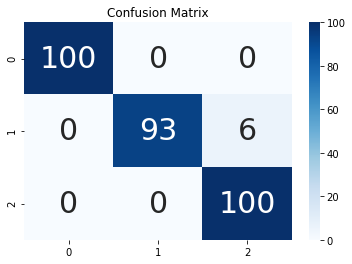

In [48]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = (confusion_matrix(y_test, y_pred, normalize="true")*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()


# 1. Solve classification problem using 'classification.csv' dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('classification.csv')
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1


#### visualise the date, do some EDA, find feature importance

In [2]:
pd.DataFrame(data).corr()

,age,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
employ,0.536497,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


Text(18.0, 0.5, 'default')

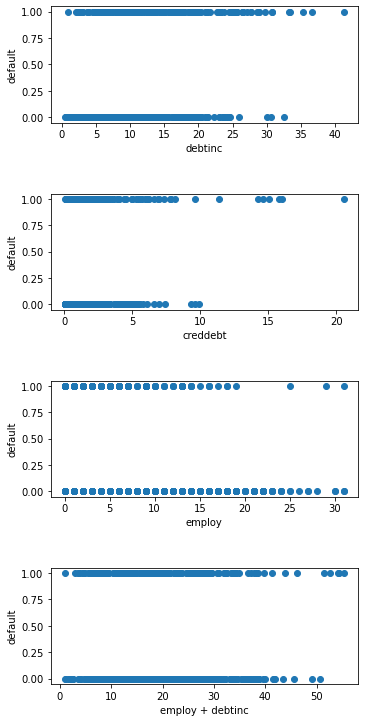

In [7]:
fig, axs = plt.subplots(4, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0].scatter(data['debtinc'], data['default'])
axs[0].set_xlabel('debtinc')
axs[0].set_ylabel('default')

axs[1].scatter(data['creddebt'], data['default'])
axs[1].set_xlabel('creddebt')
axs[1].set_ylabel('default')

axs[2].scatter(data['employ'], data['default'])
axs[2].set_xlabel('employ')
axs[2].set_ylabel('default')

axs[3].scatter(data['employ'] + data['debtinc'], data['default'])
axs[3].set_xlabel('employ + debtinc')
axs[3].set_ylabel('default')

In [ ]:
# these plots are mostly useless, further I make onehotencoding with "ed" 
# + dropping some columns based on corr matrix and even adding one feature like data.debtinc * data.creddebt

# playing with the classifier, adding and dropping different features manually I've gained 
# some maximal yet unbalanced score ~0.83, even checked if changing the threshold will change nothing {seems that no} 

##### target variable is 'default'. Apply feature selection, feature scaling, cross validation etc. (anything you think is needed)

In [44]:
import pandas as pd
import numpy as np

data = pd.read_csv('classification.csv')

y = data['default']

x1 = pd.get_dummies(data[['ed']]) 
x2 = data.drop(['ed', 'age', 'address', 'income'], axis = 1)

X = pd.concat([x1, x2], axis = 1)
X = X.drop(['ed_high school', 'ed_postgraduate'], axis = 1)
X['add_feature_1'] = X.debtinc * X.creddebt

X.corr()

X = X.drop(['default'], axis = 1)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state = 1)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=10000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

probs_y = classifier.predict_proba(X_test)

classifier.score(X_test, y_test)

0.8324873096446701

[[139   4]
 [ 29  25]]


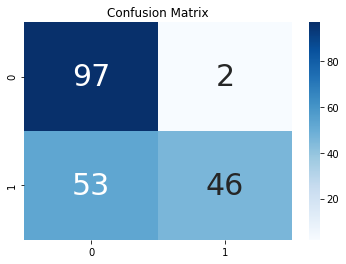

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

df_cm = confusion_matrix(y_test, y_pred, normalize="true")
df_cm

# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = (confusion_matrix(y_test, y_pred, normalize="true")*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [13]:
# ... which in any case is a good classifier for the first class yet is not so good for the second one. 
# Hence: making a balanced classification:

In [47]:
classifier = LogisticRegression(random_state = 0, max_iter=10000, class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

probs_y = classifier.predict_proba(X_test)

classifier.score(X_test, y_test)

0.7817258883248731

[[113  30]
 [ 13  41]]


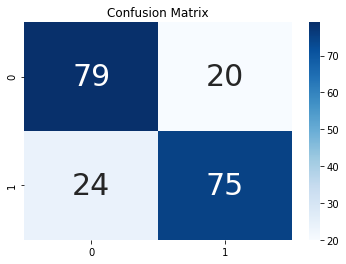

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

df_cm = confusion_matrix(y_test, y_pred, normalize="true")
df_cm

# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = (confusion_matrix(y_test, y_pred, normalize="true")*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
# ... playing a lot with this regression we see that the best way is the balanced classification.

# 2. Print accuracy, confusion matrix, precision, recall, sensitivity and specifity on train and test (and maybe validation) datasets.

##### do not use any libraries for metrics, implement yourself

In [64]:
def LR_accuracy(y_test, y_pred):
    acc = len(np.argwhere((y_pred - y_test) == 0))/len(y_test)
    return acc
    
def LR_confusion_matrix(y_test, y_pred):   
    l1 = np.unique(y_test)
    conf_matrix = np.zeros((len(l1), len(l1)))
    for i in l1:
        l2 = np.reshape(np.argwhere(y_test == i), -1)
        l3 = []
        for j in l2:
            l3.append(y_pred[j])
        for k in l1:
            conf_matrix[i, k] = len(np.reshape(np.argwhere(l3 == k), -1))
            
    return conf_matrix

def LR_prec(y_test, y_pred):
    conf_matr = LR_confusion_matrix(y_test, y_pred)
    return conf_matr[1,1]/(conf_matr[1,1] + conf_matr[0,1])

def LR_recall(y_test, y_pred):
    conf_matr = LR_confusion_matrix(y_test, y_pred)
    return conf_matr[1,1]/(conf_matr[1,1] + conf_matr[1,0])

def LR_sensitivity(y_test, y_pred):
    conf_matr = LR_confusion_matrix(y_test, y_pred)
    return conf_matr[1,1]/conf_matr[1,0]

def LR_specifity(y_test, y_pred):
    conf_matr = LR_confusion_matrix(y_test, y_pred)
    return conf_matr[0,1]/conf_matr[0,0]

In [69]:
# scores for the train data
classifier = LogisticRegression(random_state = 0, max_iter=10000, class_weight='balanced')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)
yy_train = y_train.to_numpy()

print('the accuracy: ', LR_accuracy(yy_train, y_pred))
print('the confusion matrix: ', '\n', LR_confusion_matrix(yy_train, y_pred))
print('the precision:', LR_prec(yy_train, y_pred))
print('the recall:', LR_recall(yy_train, y_pred))
print('the sensitivity:', LR_sensitivity(yy_train, y_pred))
print('the specifity:', LR_specifity(yy_train, y_pred))

the accuracy:  0.757455268389662
the confusion matrix:  
 [[282.  92.]
 [ 30.  99.]]
the precision: 0.518324607329843
the recall: 0.7674418604651163
the sensitivity: 3.3
the specifity: 0.3262411347517731


In [70]:
y_pred = classifier.predict(X_test)
yy_test = y_test.to_numpy()

print('the accuracy: ', LR_accuracy(yy_test, y_pred))
print('the confusion matrix: ', '\n', LR_confusion_matrix(yy_test, y_pred))
print('the precision:', LR_prec(yy_test, y_pred))
print('the recall:', LR_recall(yy_test, y_pred))
print('the sensitivity:', LR_sensitivity(yy_test, y_pred))
print('the specifity:', LR_specifity(yy_test, y_pred))

the accuracy:  0.7817258883248731
the confusion matrix:  
 [[113.  30.]
 [ 13.  41.]]
the precision: 0.5774647887323944
the recall: 0.7592592592592593
the sensitivity: 3.1538461538461537
the specifity: 0.26548672566371684


## Implement gradient descent on logistic regression

In [70]:
# example of updating one weight
epochs = 50
lr = 0.1
for _ in range(epochs):
    w1 -= lr * x1 * (y_hat - y) # y_hat is predicted value

#### Remember that the derivative of loss function has the following formula
<img src="Loss.png">

In [18]:
# my Logistic Regression code for two-class unbalanced classifier 

class my_LogisticRegression:
    def __init__(self, x_train, y_train, x_test):
        self.x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]
        self.y_train = y_train.reshape(-1,1)
        self.x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]
        self.thetas = np.zeros(((self.x_train.shape)[1], 1))
        self.lr = 0.001
        self.epochs = 40
    
    def update_weights(self):
        return np.dot(self.x_train.T, self.sigmoid(np.dot(self.x_train, self.thetas)) - self.y_train)
    
    def cost_function(self, x, y):
        self.loss_1 = y.reshape(-1,1) * np.log(self.sigmoid(np.dot(np.c_[np.ones((x.shape[0], 1)), x], self.thetas))) 
        self.loss_2 = (1 - y.reshape(-1,1)) * np.log(1 - self.sigmoid(np.dot(np.c_[np.ones((x.shape[0], 1)), x], self.thetas))) 
        self.loss = np.sum(self.loss_1 + self.loss_2)
        return self.loss
    
    def fit(self):
        for i in range(self.epochs):
            self.thetas -= self.lr * self.update_weights()
        print(np.round(self.thetas,2))
        return self.thetas.T
    
    def predict(self):
        self.y_pred = np.rint(1/(1 + np.exp( - np.dot(self.x_test, self.thetas))))
        return self.y_pred 
    
    def predict_proba(self):
        self.y_proba = 1/(1 + np.exp( - np.dot(self.x_test, self.thetas)))
        return np.c_[1 - self.y_proba, self.y_proba]
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [2]:
# let's take the same iris dataset, leave only two classes and test on it my logistic regression class

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

X, y = load_iris(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

l1 = np.argwhere(y_train == 2)
l2 = np.argwhere(y_test == 2)

X_train = np.delete(X_train, l1, axis=0)
y_train = np.delete(y_train, l1, axis=0)

X_test = np.delete(X_test, l2, axis=0)
y_test = np.delete(y_test, l2, axis=0)

In [10]:
#sklearn 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [3]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1])

In [11]:
# my_LogisticRegression
my_LR = my_LogisticRegression(X_train, y_train, X_test)
my_model = my_LR.fit()

AttributeError: 'Series' object has no attribute 'reshape'

In [4]:
my_y_pred = my_LR.predict()
my_y_pred.T

array([[1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.]])

In [5]:
# absolutely the same
y_pred - my_y_pred.T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [6]:
my_probs_y = my_LR.predict_proba()
np.round(my_probs_y,3)

array([[0.072, 0.928],
       [0.963, 0.037],
       [0.907, 0.093],
       [0.93 , 0.07 ],
       [0.055, 0.945],
       [0.04 , 0.96 ],
       [0.103, 0.897],
       [0.072, 0.928],
       [0.044, 0.956],
       [0.046, 0.954],
       [0.042, 0.958],
       [0.933, 0.067],
       [0.051, 0.949],
       [0.047, 0.953],
       [0.875, 0.125],
       [0.952, 0.048],
       [0.051, 0.949],
       [0.841, 0.159],
       [0.86 , 0.14 ],
       [0.955, 0.045],
       [0.879, 0.121],
       [0.078, 0.922],
       [0.15 , 0.85 ],
       [0.883, 0.117],
       [0.048, 0.952],
       [0.918, 0.082],
       [0.083, 0.917],
       [0.923, 0.077],
       [0.018, 0.982]])

In [78]:
# insights: lr and min number of epochs are tuned manually based on the answers.
# starting from some epochs_min my classifier gives correct answers, 
# for example: when lr = 0.1 we need at least 10 epochs to get the correct classes for this dataset

# taking the same dataset and leaving another two classes also gives correct results

In [12]:
# let's take the crediting dataset and test on it my logistic regression class

import pandas as pd
import numpy as np

data = pd.read_csv('classification.csv')

y = data['default']

x1 = pd.get_dummies(data[['ed']]) 
x2 = data.drop(['ed', 'age', 'address', 'income'], axis = 1)

X = pd.concat([x1, x2], axis = 1)
X = X.drop(['ed_high school', 'ed_postgraduate'], axis = 1)
X['add_feature_1'] = X.debtinc * X.creddebt

X.corr()

X = X.drop(['default'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state = 1)

In [8]:
#sklearn 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=10000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
# my_LogisticRegression
my_LR = my_LogisticRegression(X_train, y_train.to_numpy(), X_test)
my_model = my_LR.fit()

[[ 0.01]
 [-0.01]
 [-0.18]
 [ 0.05]
 [-7.06]
 [-0.04]
 [-0.85]
 [-1.78]
 [-0.04]]


<ipython-input-18-c5b17a3e95fb>:36: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [9]:
my_y_pred = my_LR.predict()
my_y_pred.T

<ipython-input-1-b04d70eeef95>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


array([[0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
        1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [165]:
#moreless the same
y_pred - my_y_pred.T

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.